Il circuito flippa la fase di un circuito. Finale facciamo un grafico sull'asse x, le iterazioni e sull'asse y, le probabilità. C'é un valore di iterazio.

In [81]:
# import libraries
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [94]:
def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.mcp(np.pi, list(range(n-1)), n-1)
    qc.x(range(n))
    qc.h(range(n))

In [95]:
def oracle(qc, n, target):
    for i in range(len(target)):
        if target[i] == '0':
            qc.x(i)
    qc.mcp(np.pi, list(range(n-1)), n-1)
    for i in range(len(target)):
        if target[i] == '0':
            qc.x(i)

In [96]:
def circuit(n, target):
    
    target_bin = np.binary_repr(target, n)
    
    qc = QuantumCircuit(n)

    qc.h(range(n))
    
    qc.barrier()
    
    # oracle
    oracle(qc, n, target_bin)
    
    qc.barrier()
    
    # diffuser
    diffuser(qc, n)
    
    qc.measure_all()
    
    result = Sampler().run([qc], shots=100).result()[0]
    co = result.data.meas.get_counts()
    # reverse target bin
    target_bin = target_bin[::-1]
    p = co[target_bin] / sum(co.values())
    return p

In [97]:
results = []
for i in range(2, 10):
    results.append(circuit(i, 1))

Text(0, 0.5, 'Probability')

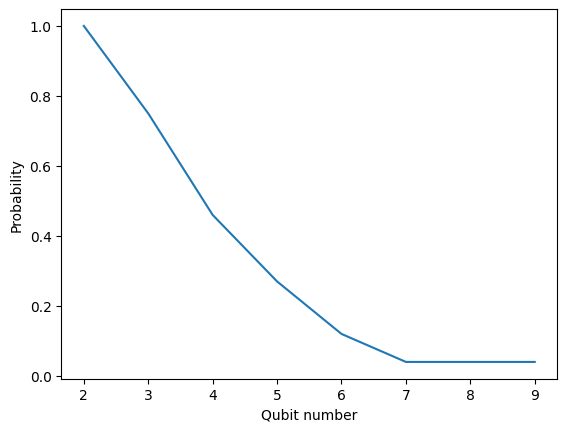

In [99]:
plt.plot(range(2, 10), results)
plt.xlabel('Qubit number')
plt.ylabel('Probability')

In [136]:
def circuit(n, target, reps):
    
    target_bin = np.binary_repr(target, n)
    
    qc = QuantumCircuit(n)

    qc.h(range(n))
    
    qc.barrier()
    
    for _ in range(reps):
        # oracle
        oracle(qc, n, target_bin)
        
        # diffuser
        diffuser(qc, n)
    
    qc.measure_all()
    
    result = Sampler().run([qc], shots=100).result()[0]
    co = result.data.meas.get_counts()
    # reverse target bin
    # target_bin = target_bin[::-1]
    # p = co[target_bin] / sum(co.values())
    maxim = max(co.values())
    print(maxim, "with reps", reps)
    return maxim
    # return p

In [142]:
results = []
for i in range(2, 15):
    results.append(circuit(2, 1, i))

29 with reps 2
32 with reps 3
100 with reps 4
28 with reps 5
27 with reps 6
100 with reps 7
29 with reps 8
32 with reps 9
100 with reps 10
31 with reps 11
30 with reps 12
100 with reps 13
31 with reps 14


Text(0, 0.5, 'Probability')

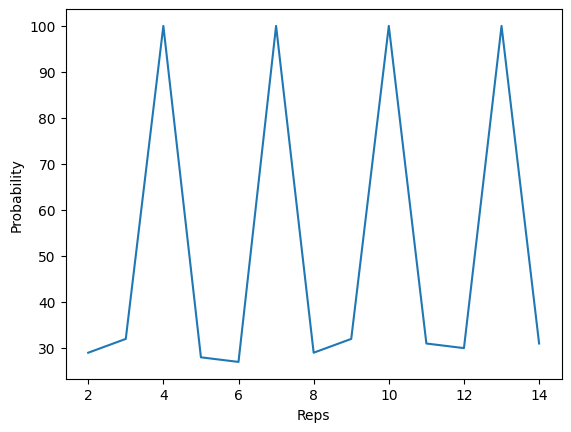

In [143]:
plt.plot(range(2, 15), results)
plt.xlabel('Reps')
plt.ylabel('Probability')